In [1]:
# Recommendation System 2 - from product image
# Input: Product Image
# Output: Suggest them the entire wardrobe(outfit) (tshirt, bottomwear, shoes) based on the product selected

In [11]:
import pandas as pd
import numpy as np
import random
import json
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_data(labels_file, train_file):
    with open(labels_file, 'r') as f:
        categories_data = json.load(f)
    categories = categories_data['categories']
    train_data = pd.read_csv(train_file)
    return categories, train_data

def create_category_mapping(categories):
    category_map = {}
    supercategory_map = {}
    for cat in categories:
        category_map[cat['id']] = cat['name']
        supercategory_map[cat['id']] = cat['supercategory']
    return category_map, supercategory_map

def group_items_by_supercategory(train_data, category_map, supercategory_map):
    train_data['category'] = train_data['ClassId'].map(category_map)
    train_data['supercategory'] = train_data['ClassId'].map(supercategory_map)
    return train_data.groupby('supercategory')

def create_recommendation_system(grouped_items):
    supercategory_items = {supercategory: group['ImageId'].unique().tolist() for supercategory, group in grouped_items}
    main_categories = list(set(supercategory_items.keys()))
    return supercategory_items, main_categories

def generate_outfit(selected_item, train_data, supercategory_items, main_categories):
    outfit = defaultdict(list)
    
    selected_item_data = train_data[train_data['ImageId'] == selected_item]
    
    if selected_item_data.empty:
        print(f"Warning: Selected item '{selected_item}' not found in the dataset.")
        selected_supercategory = random.choice(main_categories)
    else:
        selected_supercategory = selected_item_data['supercategory'].iloc[0]
    
    outfit[selected_supercategory].append(selected_item)
    
    for category in main_categories:
        if category != selected_supercategory:
            if category in supercategory_items and supercategory_items[category]:
                outfit[category].append(random.choice(supercategory_items[category]))
    
    return outfit

def display_outfit(selected_item, recommended_outfit, image_folder):
    fig, axs = plt.subplots(1, len(recommended_outfit) + 1, figsize=(20, 4))
    fig.suptitle("Input Item and Recommended Outfit", fontsize=16)

    # Display input item
    axs[0].set_title("Input Item")
    input_img = Image.open(os.path.join(image_folder, selected_item))
    axs[0].imshow(input_img)
    axs[0].axis('off')

    # Display recommended items
    for i, (category, items) in enumerate(recommended_outfit.items(), 1):
        if items:
            axs[i].set_title(category)
            img = Image.open(os.path.join(image_folder, items[0]))
            axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

def run_recommendation_system(labels_file, train_file, selected_item, image_folder):
    categories, train_data = load_data(labels_file, train_file)
    category_map, supercategory_map = create_category_mapping(categories)
    
    if selected_item not in train_data['ImageId'].values:
        print(f"Warning: Selected item '{selected_item}' not found in the dataset. Choosing a random item.")
        selected_item = random.choice(train_data['ImageId'].unique())
    
    grouped_items = group_items_by_supercategory(train_data, category_map, supercategory_map)
    supercategory_items, main_categories = create_recommendation_system(grouped_items)
    
    outfit = generate_outfit(selected_item, train_data, supercategory_items, main_categories)
    display_outfit(selected_item, outfit, image_folder)
    return outfit

# Example usage
labels_file = r'myntra-dataset\label_descriptions.json'
train_file = r'myntra-dataset\train.csv'
image_folder = r'myntra-dataset\train'  # Folder containing your training images
selected_item = '0a0a539316af6547b3bbe228ead13730.jpg'  # This should be a valid ImageId from your dataset

recommended_outfit = run_recommendation_system(labels_file, train_file, selected_item, image_folder)
print("Recommended Outfit:")
for category, items in recommended_outfit.items():
    print(f"{category}: {items}")

KeyboardInterrupt: 

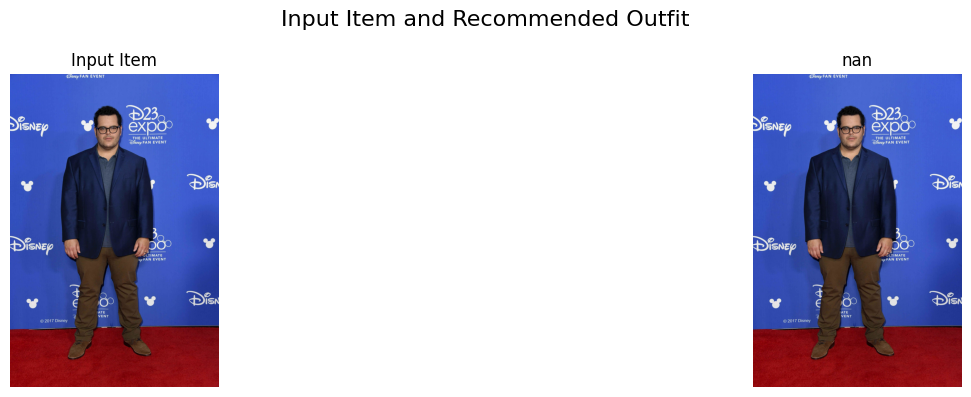

Recommended Outfit:
nan: ['8edb7742e3ec2e6ca5936ef1cda5bcab.jpg']


In [12]:
import pandas as pd
import numpy as np
import random
import json
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_data(labels_file, train_file):
    with open(labels_file, 'r') as f:
        categories_data = json.load(f)
    categories = categories_data['categories']
    train_data = pd.read_csv(train_file)
    return categories, train_data

def create_category_mapping(categories):
    category_map = {}
    supercategory_map = {}
    for cat in categories:
        category_map[cat['id']] = cat['name']
        supercategory_map[cat['id']] = cat['supercategory']
    return category_map, supercategory_map

def group_items_by_supercategory(train_data, category_map, supercategory_map):
    train_data['category'] = train_data['ClassId'].map(category_map)
    train_data['supercategory'] = train_data['ClassId'].map(supercategory_map)
    return train_data.groupby('supercategory')

def create_recommendation_system(grouped_items):
    supercategory_items = {supercategory: group['ImageId'].unique().tolist() for supercategory, group in grouped_items}
    main_categories = list(set(supercategory_items.keys()))
    return supercategory_items, main_categories

def generate_outfit(selected_item, train_data, supercategory_items, main_categories):
    outfit = defaultdict(list)
    
    selected_item_data = train_data[train_data['ImageId'] == selected_item]
    
    if selected_item_data.empty:
        print(f"Warning: Selected item '{selected_item}' not found in the dataset.")
        selected_supercategory = random.choice(main_categories)
    else:
        selected_supercategory = selected_item_data['supercategory'].iloc[0]
    
    outfit[selected_supercategory].append(selected_item)
    
    for category in main_categories:
        if category != selected_supercategory:
            if category in supercategory_items and supercategory_items[category]:
                outfit[category].append(random.choice(supercategory_items[category]))
    
    return outfit

def display_outfit(selected_item, recommended_outfit, image_folder):
    fig, axs = plt.subplots(1, len(recommended_outfit) + 1, figsize=(20, 4))
    fig.suptitle("Input Item and Recommended Outfit", fontsize=16)

    # Display input item
    axs[0].set_title("Input Item")
    input_img = Image.open(os.path.join(image_folder, selected_item))
    axs[0].imshow(input_img)
    axs[0].axis('off')

    # Display recommended items
    for i, (category, items) in enumerate(recommended_outfit.items(), 1):
        if items:
            axs[i].set_title(category)
            img = Image.open(os.path.join(image_folder, items[0]))
            axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

def run_recommendation_system(labels_file, train_file, selected_item, image_folder):
    categories, train_data = load_data(labels_file, train_file)
    category_map, supercategory_map = create_category_mapping(categories)
    
    if selected_item not in train_data['ImageId'].values:
        print(f"Warning: Selected item '{selected_item}' not found in the dataset. Choosing a random item.")
        selected_item = random.choice(train_data['ImageId'].unique())
    
    grouped_items = group_items_by_supercategory(train_data, category_map, supercategory_map)
    supercategory_items, main_categories = create_recommendation_system(grouped_items)
    
    outfit = generate_outfit(selected_item, train_data, supercategory_items, main_categories)
    display_outfit(selected_item, outfit, image_folder)
    return outfit

# Example usage
labels_file = r'myntra-dataset\label_descriptions.json'
train_file = r'myntra-dataset\train.csv'
image_folder = r'myntra-dataset\train'  # Folder containing your training images
selected_item = '003d41dd20f271d27219fe7ee6de727d.jpg'  # This should be a valid ImageId from your dataset

recommended_outfit = run_recommendation_system(labels_file, train_file, selected_item, image_folder)
print("Recommended Outfit:")
for category, items in recommended_outfit.items():
    print(f"{category}: {items}")
